# Logistic regression on Algerian forest Dataset



*   This dataset comprises of Algerian Forest Fire Dataset taken from UCI .
*   Link of the dataset is as follows :- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ .




### 2) Data Collection.
* This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
* 122 instances for each region .
* The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Temperature
*The data consists of 14 column and 246 rows.

### Importing necessary liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/data_science_data/Algerian_forest_fires_dataset.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
data.shape

(247, 14)

There are 247 records with 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

There are certain null values

In [ ]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


checking for the rows containing the null values.

In [ ]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


duplicate row

In [ ]:
data.iloc[124,:]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 124, dtype: object

In [ ]:
data.drop([122,123,124],inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

Getting column names

In [ ]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Removing the extra space from the column name

In [ ]:
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Getting unique values from the Classes columns

In [ ]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [ ]:
data['Classes']=data['Classes'].str.strip()
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

### Creating Regions

In [ ]:
data.loc[:122,'region']='bajaia'
data.loc[122:,'region']='Sidi-Bel Abbes'

In [ ]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

Removing the extra space from the values

In [ ]:
for feature in ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']:
  data[feature]=data[feature].str.replace(" ","")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


Raplacing not fire as 0 and fire as 1

In [ ]:
data['Classes']=data['Classes'].str.replace('not fire','0')
data['Classes']=data['Classes'].str.replace('fire','1')

In [ ]:
data['region'].unique()

array(['bajaia', 'Sidi-Bel Abbes'], dtype=object)

In [ ]:
data['region']=data['region'].str.replace('bajaia','0')
data['region']=data['region'].str.replace('Sidi-Bel Abbes','1')


Getting unique value for FWI column

In [ ]:
data['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

In [ ]:
data[data['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [ ]:
data['FWI'].mode()

0    0.4
Name: FWI, dtype: object

replacing fire value as mode of FWI column

In [ ]:
data.loc[165,'FWI']='0.4'

In [ ]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

One null value is in the Classes column

In [ ]:
data[data['Classes']=='nan'].index

Int64Index([], dtype='int64')

In [ ]:
data.loc[165,'Classes']='1'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


### Converting columns datatypes to required ones

In [ ]:
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"region","Classes"]]=data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"region","Classes"]].astype(int)

In [ ]:
data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  region       244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


### Creating a copy of dataframe from original dataframe


In [ ]:
df=data.copy()

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


### Statistilcal Analysis

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

no null values are there

### Getting correlation of data

In [ ]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333,-9.586232e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132,-8.148217e-02


<Axes: >

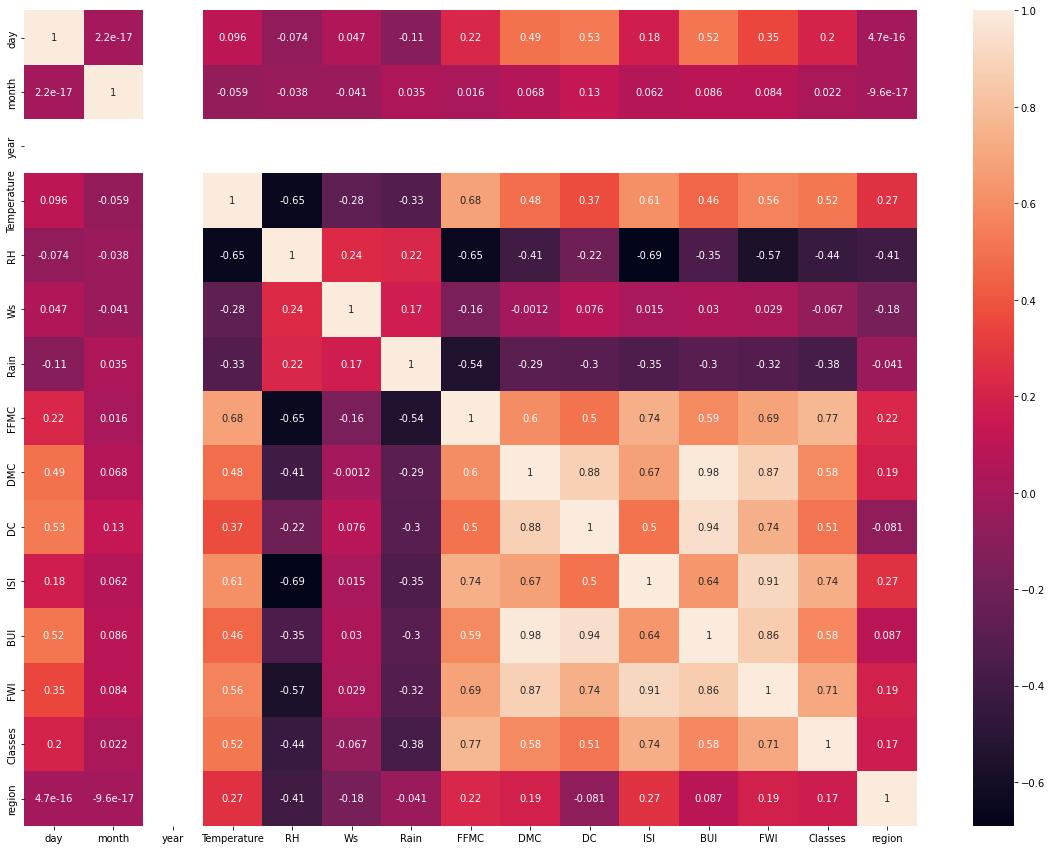

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

Observation

* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI
* RH is negatively corelated with Temperature, FFMC and ISI

In [ ]:
df.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,7.788167e+01,4.641920e-16,0.0,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.032065,0.884504,-2.193033e-17
month,4.641920e-16,1.238683e+00,0.0,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696296,0.012346,0.000000e+00
year,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Temperature,3.071308e+00,-2.386831e-01,0.0,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.102287,0.935168,4.979424e-01
RH,-9.747689e+00,-6.275720e-01,0.0,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.152169,-3.216117,-3.030864e+00
Ws,1.165621e+00,-1.296296e-01,0.0,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.606139,-0.092862,-2.489712e-01
Rain,-1.980908e+00,7.860082e-02,0.0,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.800293,-0.376833,-4.115226e-02
FFMC,2.834676e+01,2.485597e-01,0.0,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.187426,5.484349,1.613992e+00
DMC,5.365433e+01,9.384774e-01,0.0,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.480590,3.588791,1.184156e+00
DC,2.218594e+02,6.766276e+00,0.0,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.143165,11.994976,-1.944053e+00


### Checking the distribution for the features

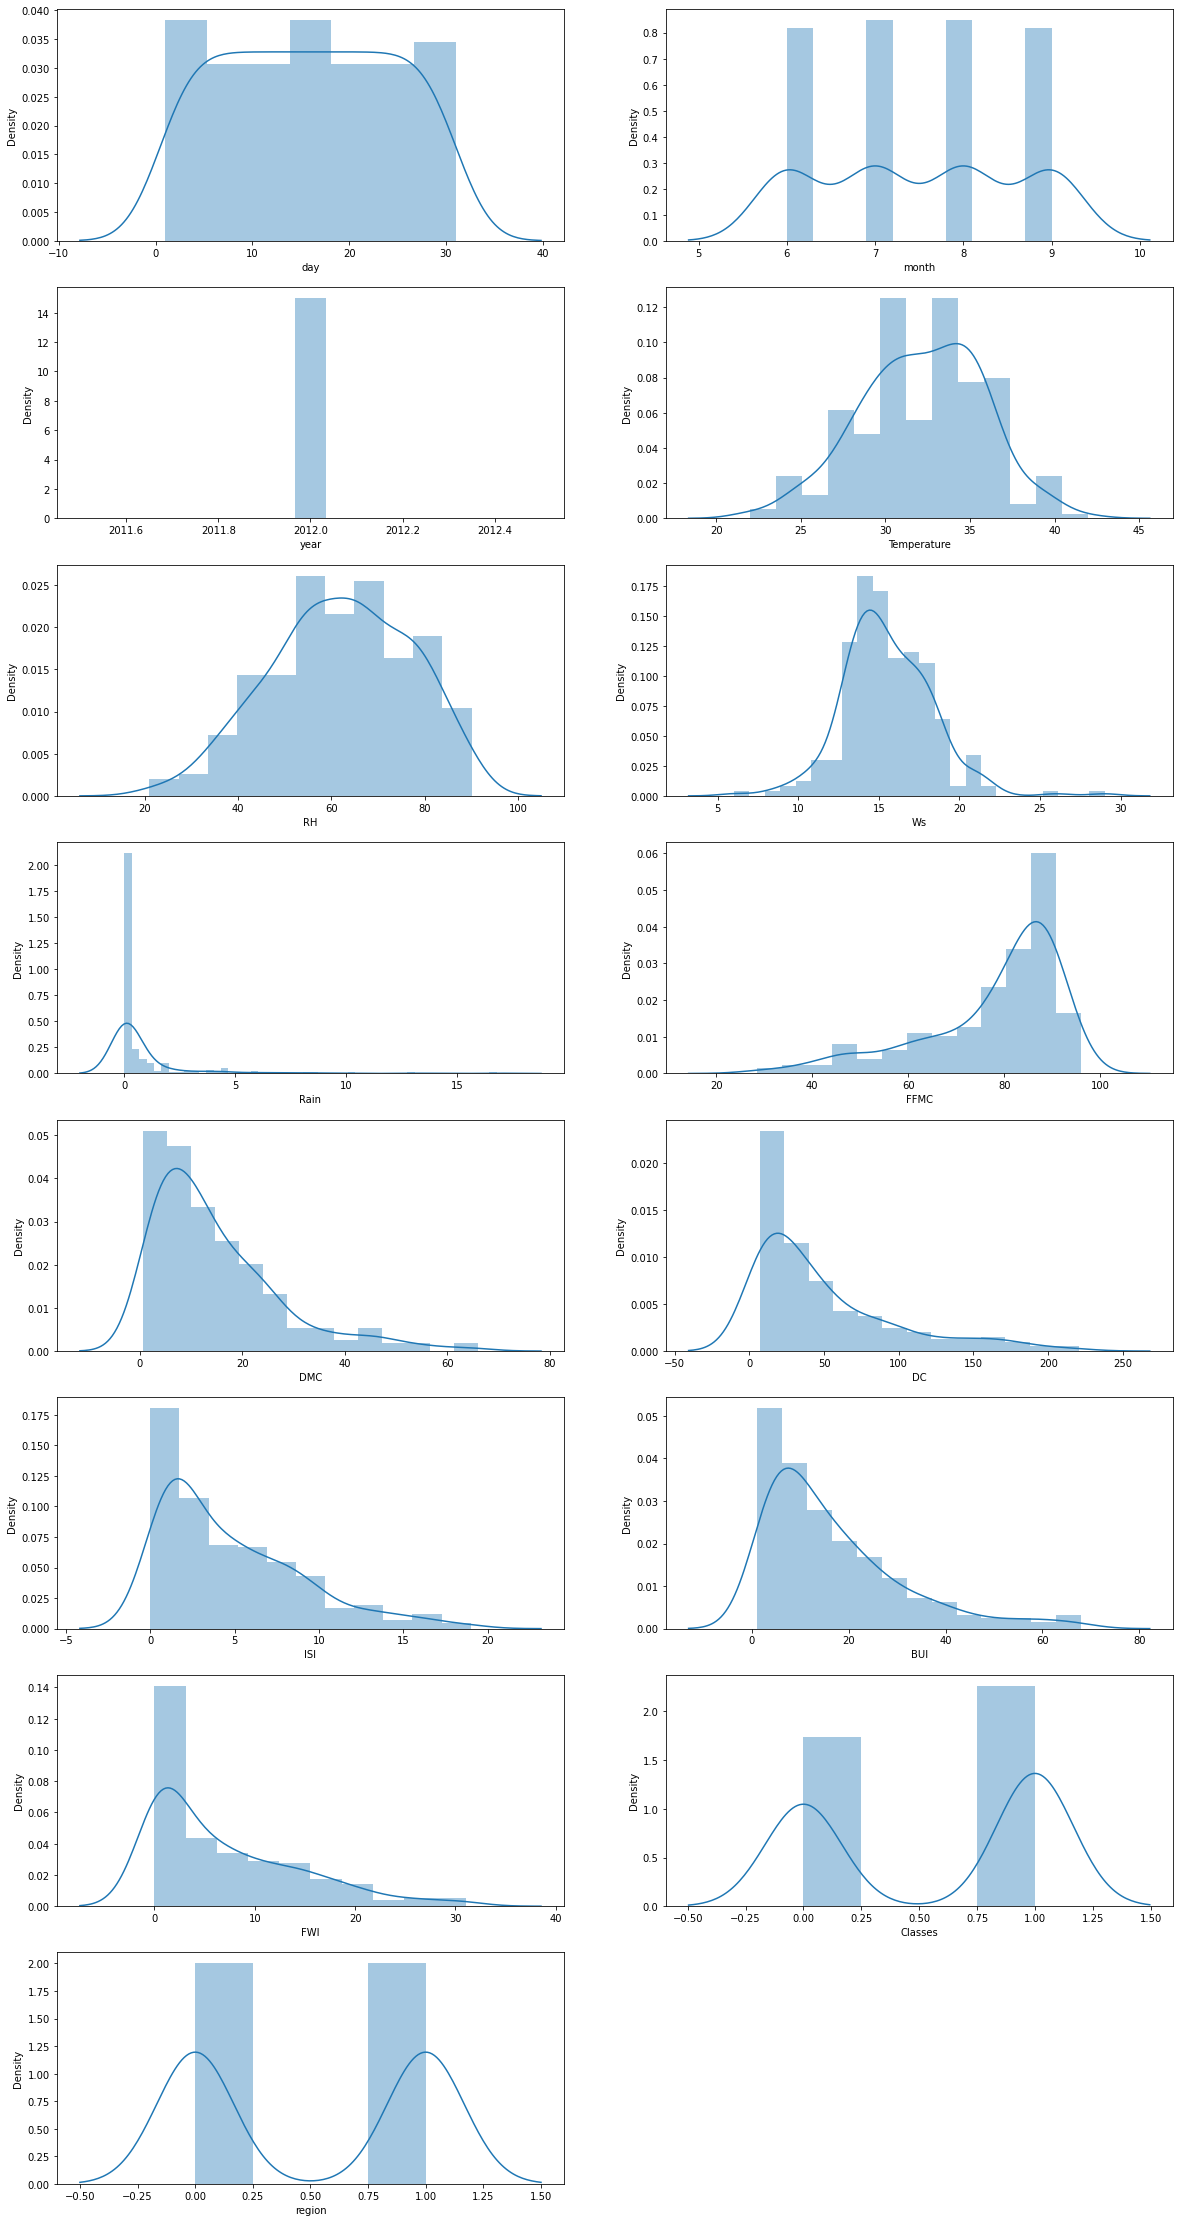

In [ ]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1
for col in df:
  if plotnumber<=15:
    pt=plt.subplot(8,2,plotnumber)
    sns.distplot(data[col])
    plt.xlabel(col)
  plotnumber+=1
plt.show()

### Observation
* There is only 2012 year therefor year has no variance
* rain, DMC, FWI, ISI, BUI are rightly skewed


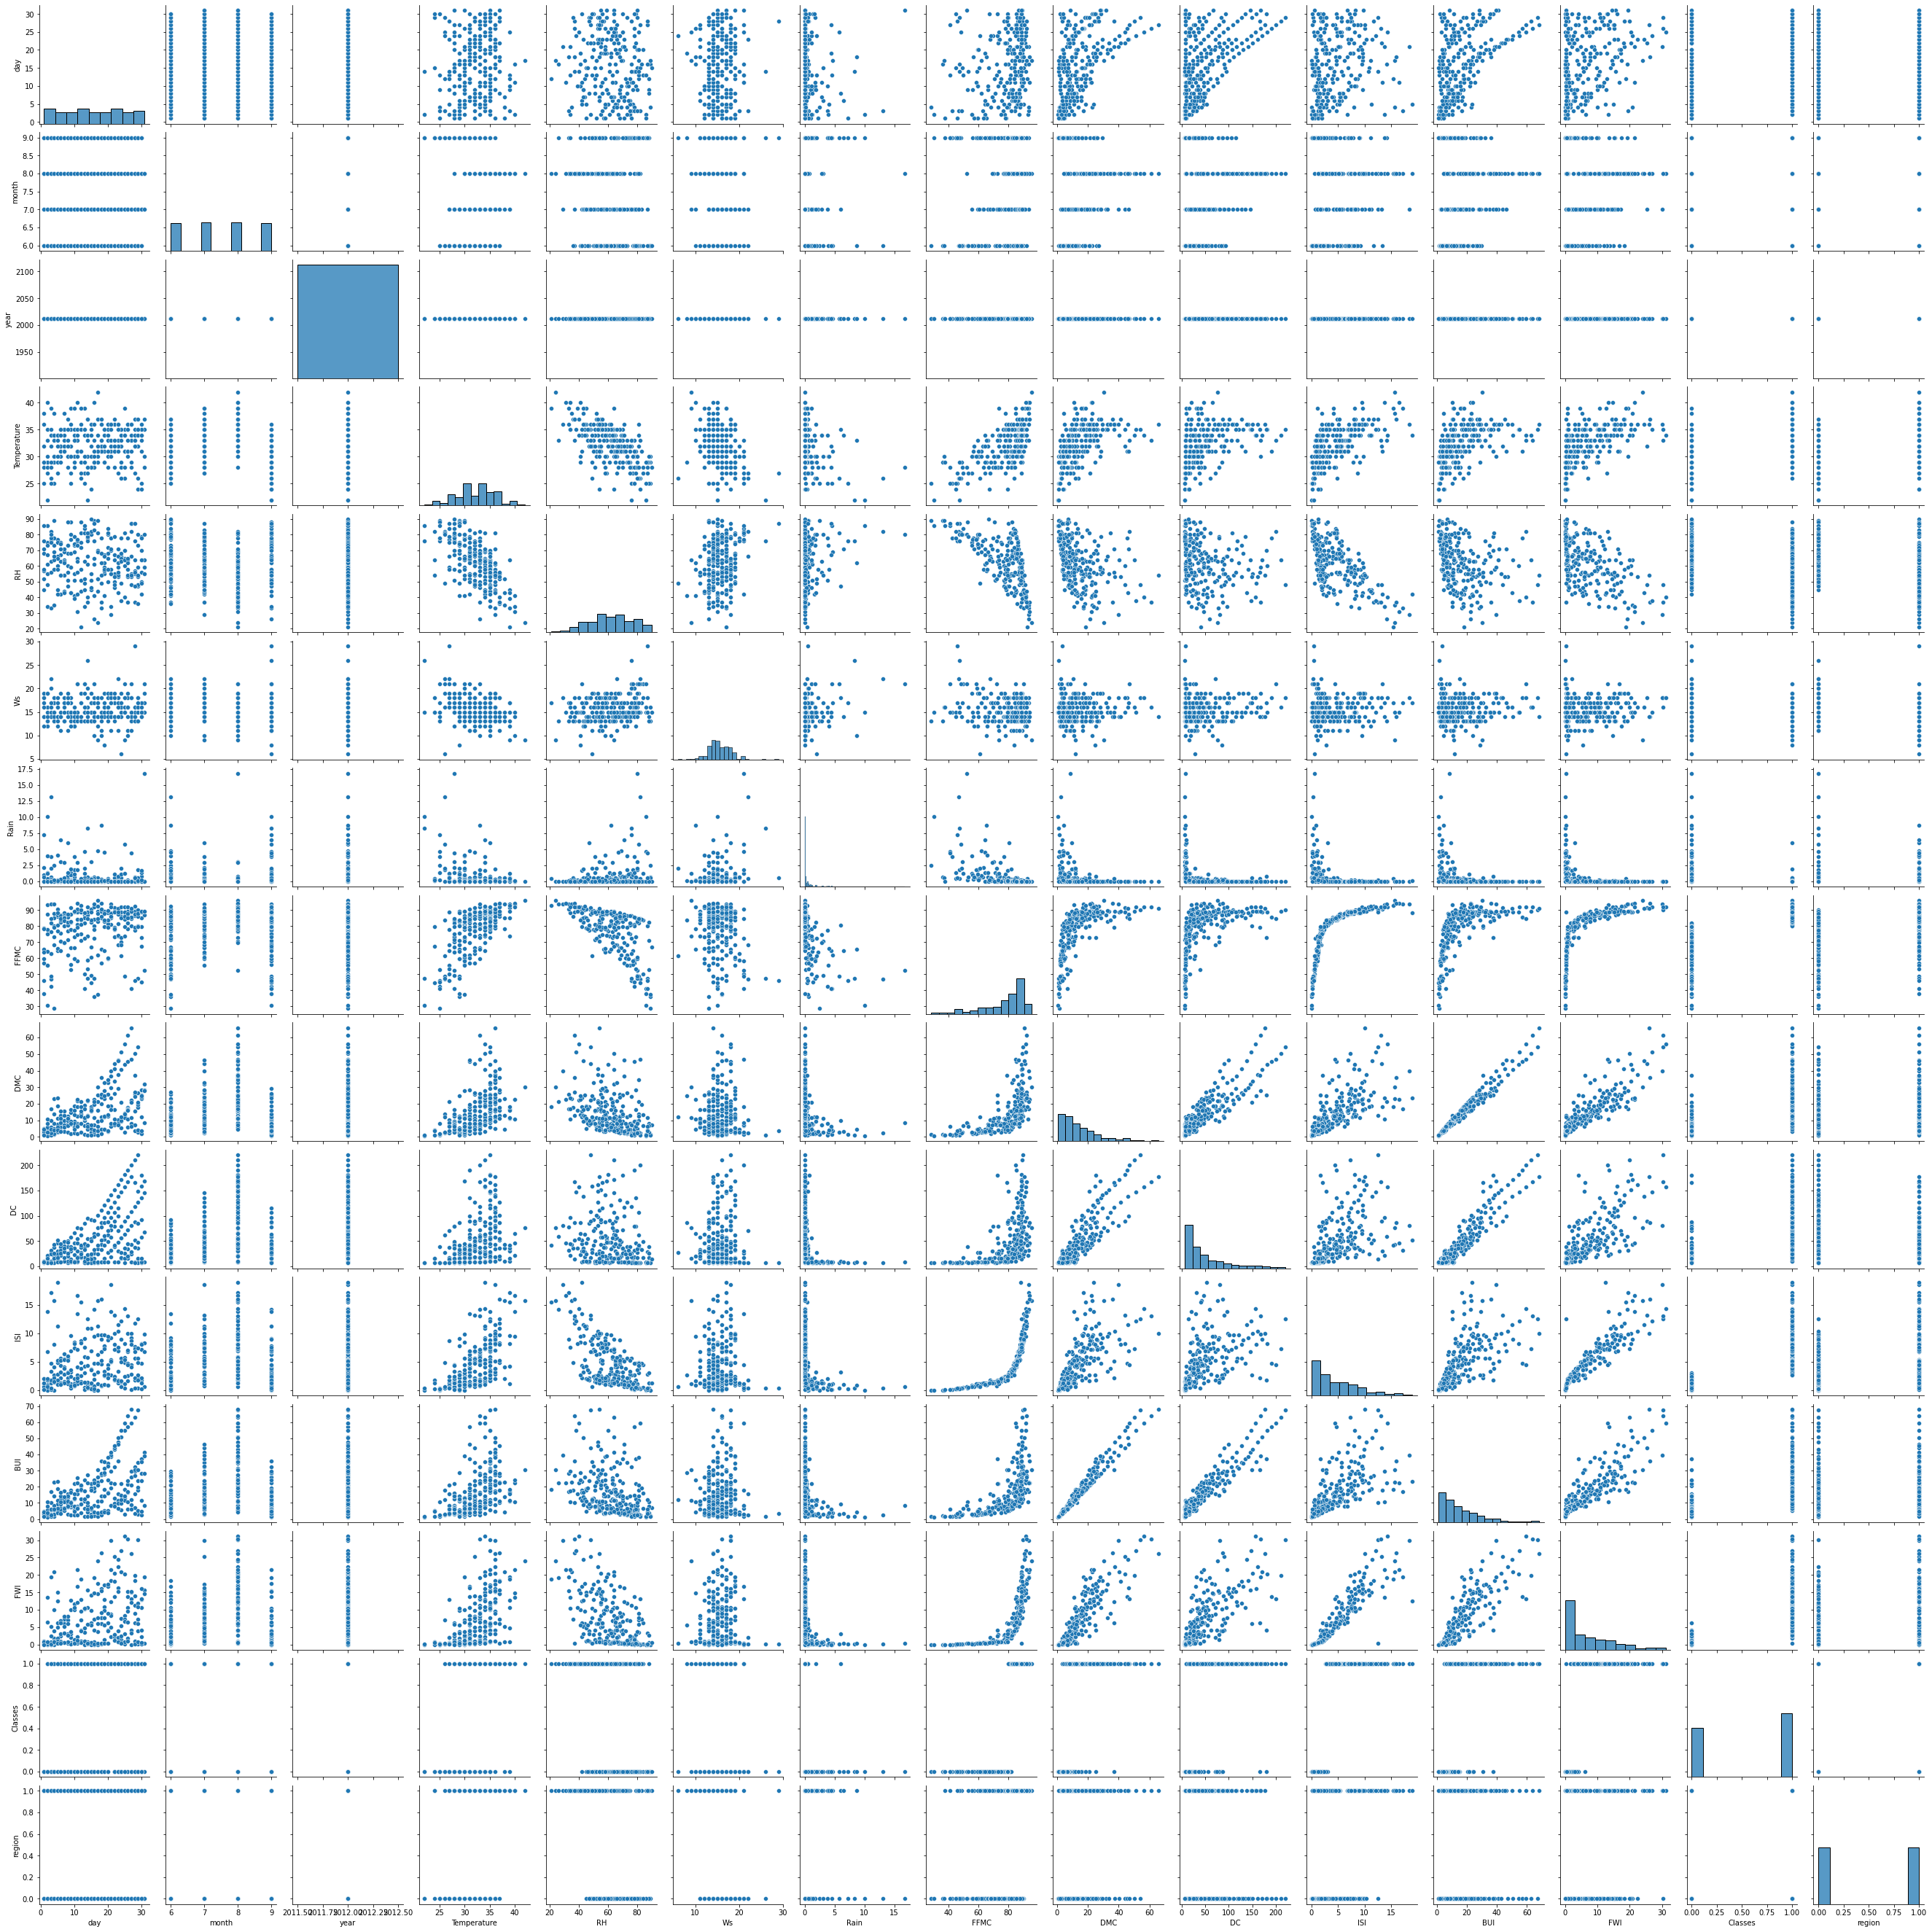

In [ ]:
sns.pairplot(df)

<Axes: xlabel='region', ylabel='Classes'>

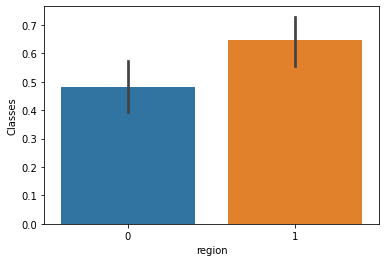

In [ ]:
sns.barplot(x="region",y="Classes",data=df)

### observation

In sidi-bel region has most fire 

<Axes: xlabel='Temperature', ylabel='Count'>

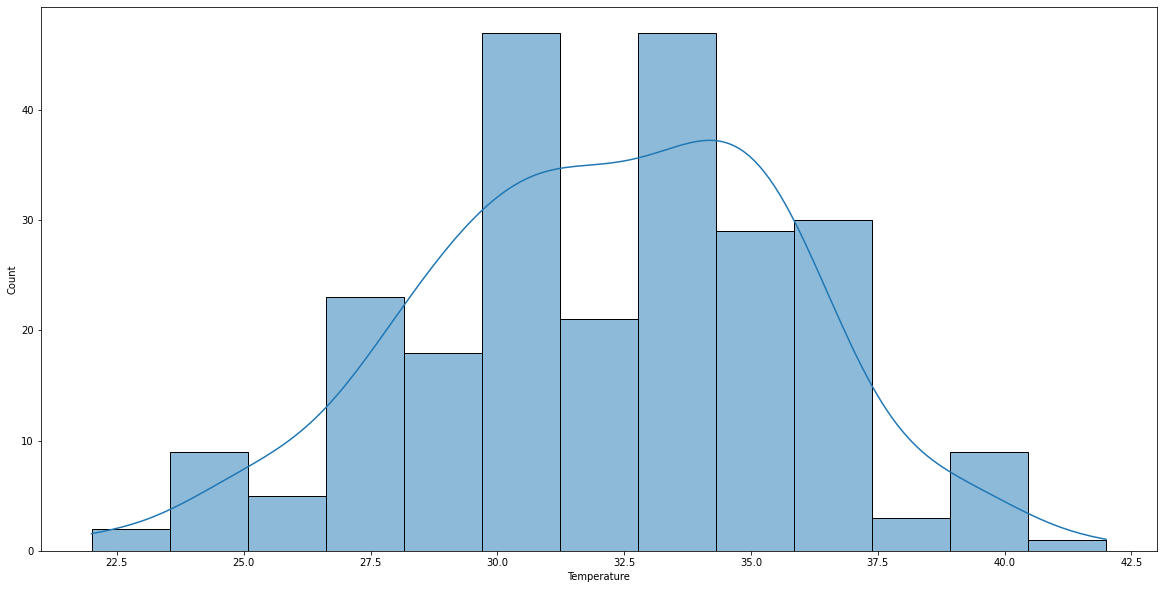

In [ ]:
plt.subplots(figsize=(20,10))
sns.histplot("Temperature Distribution",x=data['Temperature'],kde=True)

The Highesht Temperature ranges between 32.5 to 35.0

<Axes: xlabel='region', ylabel='Rain'>

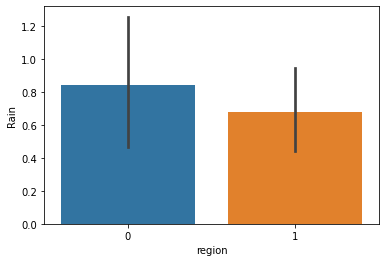

In [ ]:
sns.barplot(x='region',y='Rain',data=data)

In bajaia region raining is more

### Detecting Outliers using Graphical method

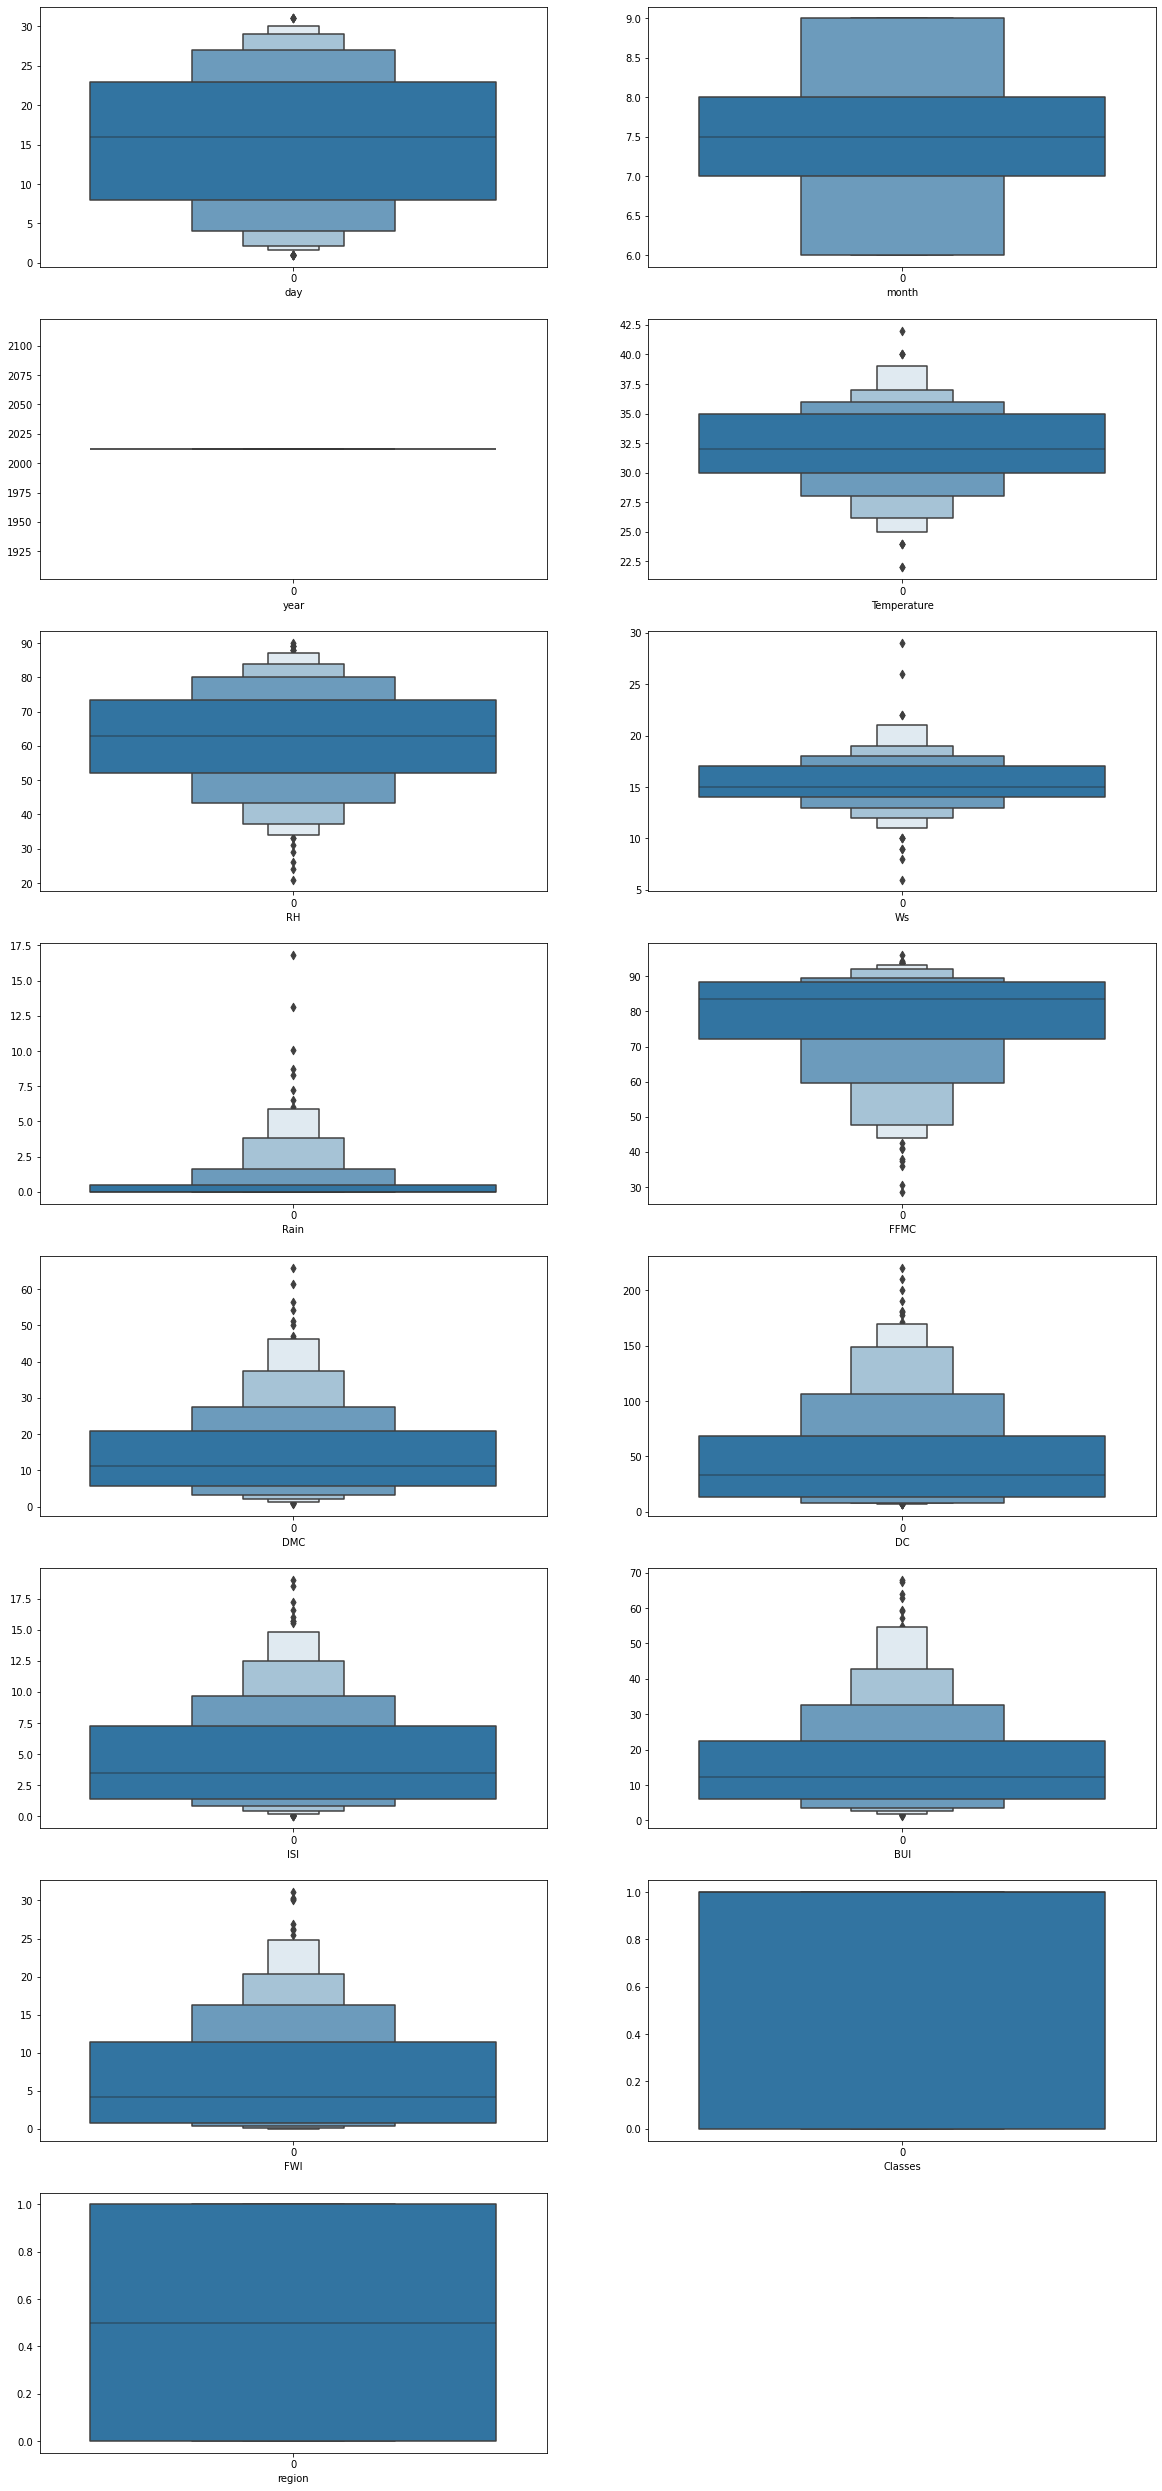

In [ ]:
plt.figure(figsize=(20,45))
plotnumber=1
for column in data:
  if plotnumber<=15:
    ax=plt.subplot(8,2,plotnumber)
    sns.boxenplot(data[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

Rain, FFMC, DMC, BUI, WS contain outliers

In [ ]:
df.shape

(244, 15)

In [ ]:
def outlier_removal(data,column):

    #Finding the IQR
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR = Q3-Q1
    
    #upper bound
    upper=Q3+1.5*IQR

    #lower bound
    lower=Q1-1.5*IQR

    print(f"lower fence of {column} is: ",lower)
    print(f"lower fence of {column} is: ",upper)
    print()
    
    #assigning the lower and upper values to the outliers
    data.loc[data[column]<=lower,column]=lower
    data.loc[data[column]>=upper,column]=upper


In [ ]:
columns=data.columns
for col in columns:
  outlier_removal(data,col)

lower fence of day is:  -14.5
lower fence of day is:  45.5

lower fence of month is:  5.5
lower fence of month is:  9.5

lower fence of year is:  2012.0
lower fence of year is:  2012.0

lower fence of Temperature is:  22.5
lower fence of Temperature is:  42.5

lower fence of RH is:  20.125
lower fence of RH is:  105.125

lower fence of Ws is:  9.5
lower fence of Ws is:  21.5

lower fence of Rain is:  -0.75
lower fence of Rain is:  1.25

lower fence of FFMC is:  47.73750000000001
lower fence of FFMC is:  112.63749999999999

lower fence of DMC is:  -16.624999999999996
lower fence of DMC is:  43.175

lower fence of DC is:  -69.03750000000002
lower fence of DC is:  150.46250000000003

lower fence of ISI is:  -7.450000000000001
lower fence of ISI is:  16.150000000000002

lower fence of BUI is:  -18.787499999999998
lower fence of BUI is:  47.3125

lower fence of FWI is:  -15.312500000000004
lower fence of FWI is:  27.387500000000003

lower fence of Classes is:  -1.5
lower fence of Classes is

Checking for the outliers again

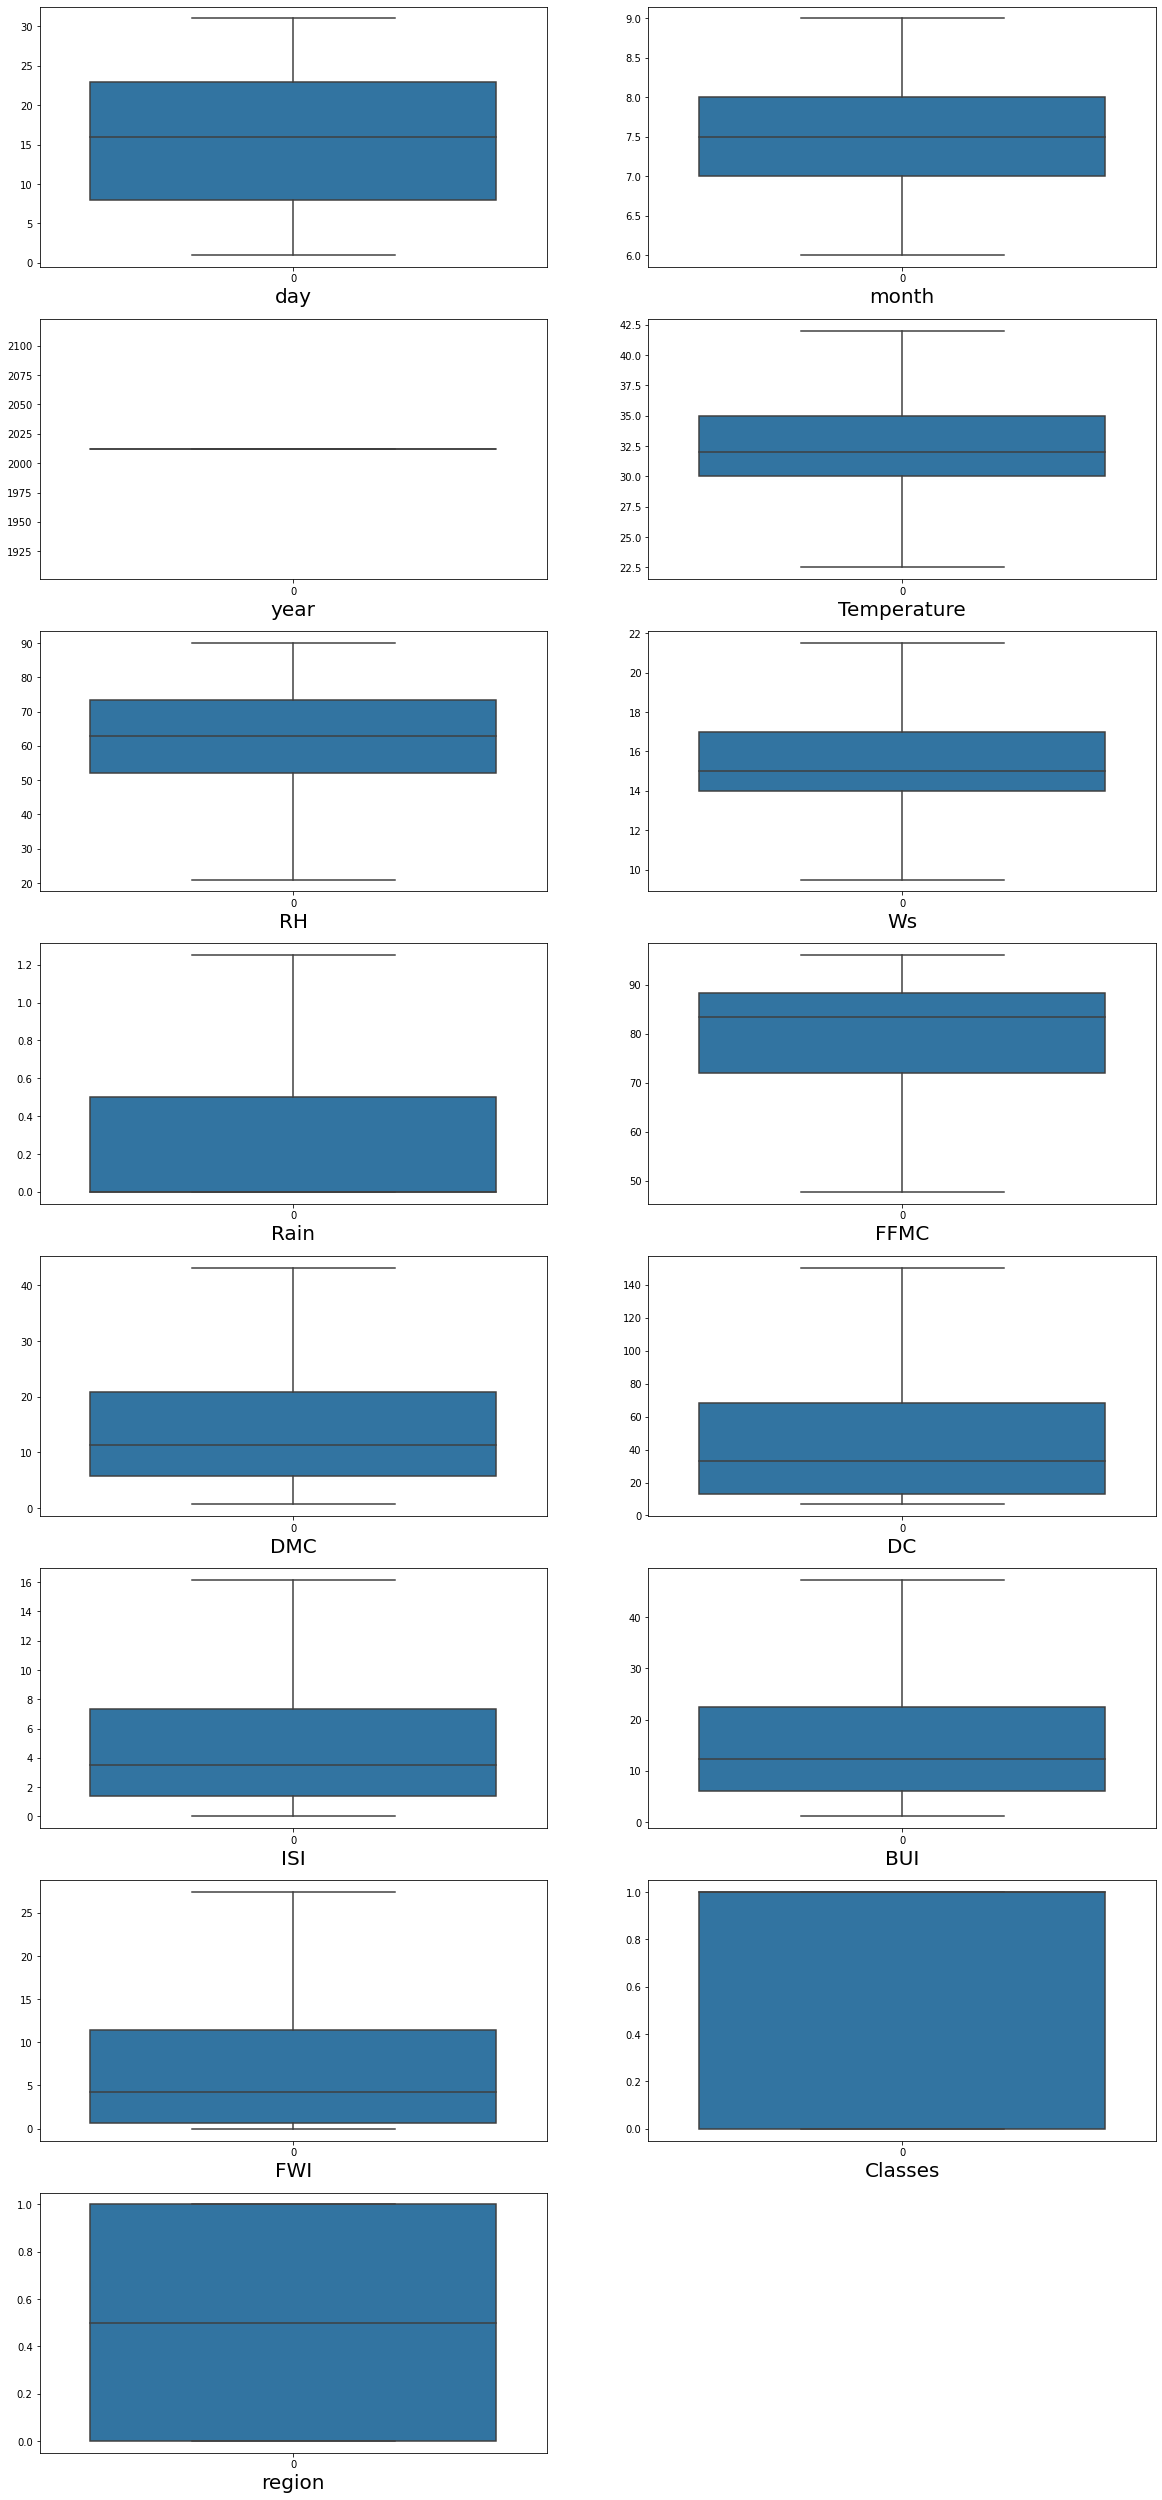

In [ ]:
plt.figure(figsize=(20,45))
plotnumber = 1

for column in data:
    if plotnumber<=15 :     
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [ ]:
data.shape

(244, 15)

### Creating dependent and independent variables

In [ ]:
x= df.drop('Classes',axis=1)

In [ ]:
x.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [ ]:
y=df['Classes']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

### Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve

### Standardizing the data

In [ ]:
### creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 ,  0.        , ..., -0.47763563,
        -0.8196431 , -0.99388373],
       [-1.19310159,  0.48116996,  0.        , ..., -0.3471914 ,
        -0.08219052, -0.99388373],
       [-0.51390872, -1.32183472,  0.        , ...,  0.09906517,
         1.36540157,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.        , ..., -1.01314351,
        -0.90158227, -0.99388373],
       [ 1.41047108, -0.42033238,  0.        , ..., -0.058841  ,
         0.31384882,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.        , ..., -0.9719506 ,
        -0.87426921, -0.99388373]])

In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.        , ...,  0.11966162,
         0.23190965, -0.99388373],
       [-0.96670396, -1.32183472,  0.        , ..., -0.38838431,
         0.0680313 , -0.99388373],
       [-1.53269802, -0.42033238,  0.        , ..., -0.60121437,
        -0.04122093,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238,  0.        , ...,  0.88173053,
         1.17421016, -0.99388373],
       [-1.3063004 , -1.32183472,  0.        , ..., -0.75225505,
        -0.77867351,  1.0061539 ],
       [ 1.29727227, -1.32183472,  0.        , ...,  0.29129877,
         0.7235447 ,  1.0061539 ]])

In [ ]:
X_test.shape

(81, 14)

In [ ]:
X_train.shape

(163, 14)

## Model building

In [ ]:
# Logistic regression model
regression=LogisticRegression()
regression

LogisticRegression()

In [ ]:
regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction of model
prediction=regression.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

### Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(prediction,y_test)
print(score)

0.9753086419753086


Classification Report

In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.96      1.00      0.98        51

    accuracy                           0.98        81
   macro avg       0.98      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81



Confusion Matrix

In [ ]:
conf_matrix=confusion_matrix(y_test,prediction)
conf_matrix

array([[28,  0],
       [ 2, 51]])

In [ ]:
truly_positive=conf_matrix[0][0]
truly_negative=conf_matrix[1][1]
false_positive=conf_matrix[1][0]
false_negative=conf_matrix[1][1]

Accuracy

In [ ]:
accuracy=round(accuracy_score(y_test,prediction),4)
accuracy

0.9753

recall

In [ ]:
recall = round(truly_positive/(truly_positive+false_positive),4)
recall

0.9333

precision

In [ ]:
precision= round(truly_positive/(truly_positive+false_negative),4)
precision

0.3544

F1 Score

In [ ]:
f1_score=2*(precision*recall)/(precision+recall)
f1_score

0.5137245010483807